In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [9]:
data = pd.read_csv('anime_with_synopsis.csv')
X = np.array(data)

In [10]:
data = data[['Genres','sypnopsis','Name']]
data.head()

,Genres,sypnopsis,Name
0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever...",Cowboy Bebop
1,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ...",Cowboy Bebop: Tengoku no Tobira
2,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0...",Trigun
3,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...,Witch Hunter Robin
4,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...,Bouken Ou Beet


In [11]:
text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/507 [00:00<?, ?it/s]

In [13]:
X = np.array(embeddings)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,-2.674054,1.427782,3.889814,2.357224,-2.887816
1,4.518212,-1.938478,1.354100,-0.302400,-1.533014
2,-3.433225,0.348008,-0.553754,1.665779,-5.188544
3,1.774251,3.178839,-1.299971,0.708921,-2.106068
4,-3.236022,0.322745,2.683866,3.364807,-0.200810


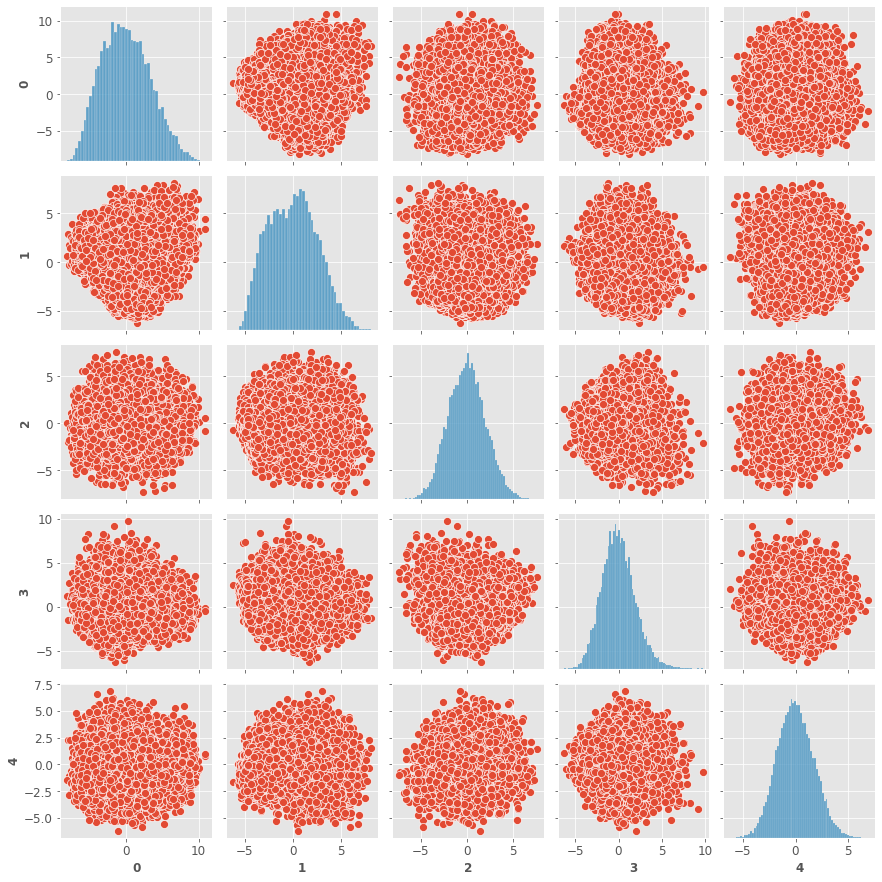

In [14]:
sns.pairplot(pca_data)

In [29]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))
def give_recommendations(index,print_recommendation = False,print_recommendation_plots= False,print_genres =False):
  index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
  movies_recomm =  data['Name'].loc[index_recomm].values
  result = {'Movies':movies_recomm,'Index':index_recomm}
  if print_recommendation==True:
    print('The watched movie is this one: %s \n'%(data['Name'].loc[index]))
    k=1
    for movie in movies_recomm:
      print('The number %i recommended movie is this one: %s \n'%(k,movie))
  if print_recommendation_plots==True:
    print('The plot of the watched movie is this one:\n %s \n'%(data['sypnopsis'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = data['sypnopsis'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  if print_genres==True:
    print('The genres of the watched movie is this one:\n %s \n'%(data['Genres'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = data['Genres'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  return result

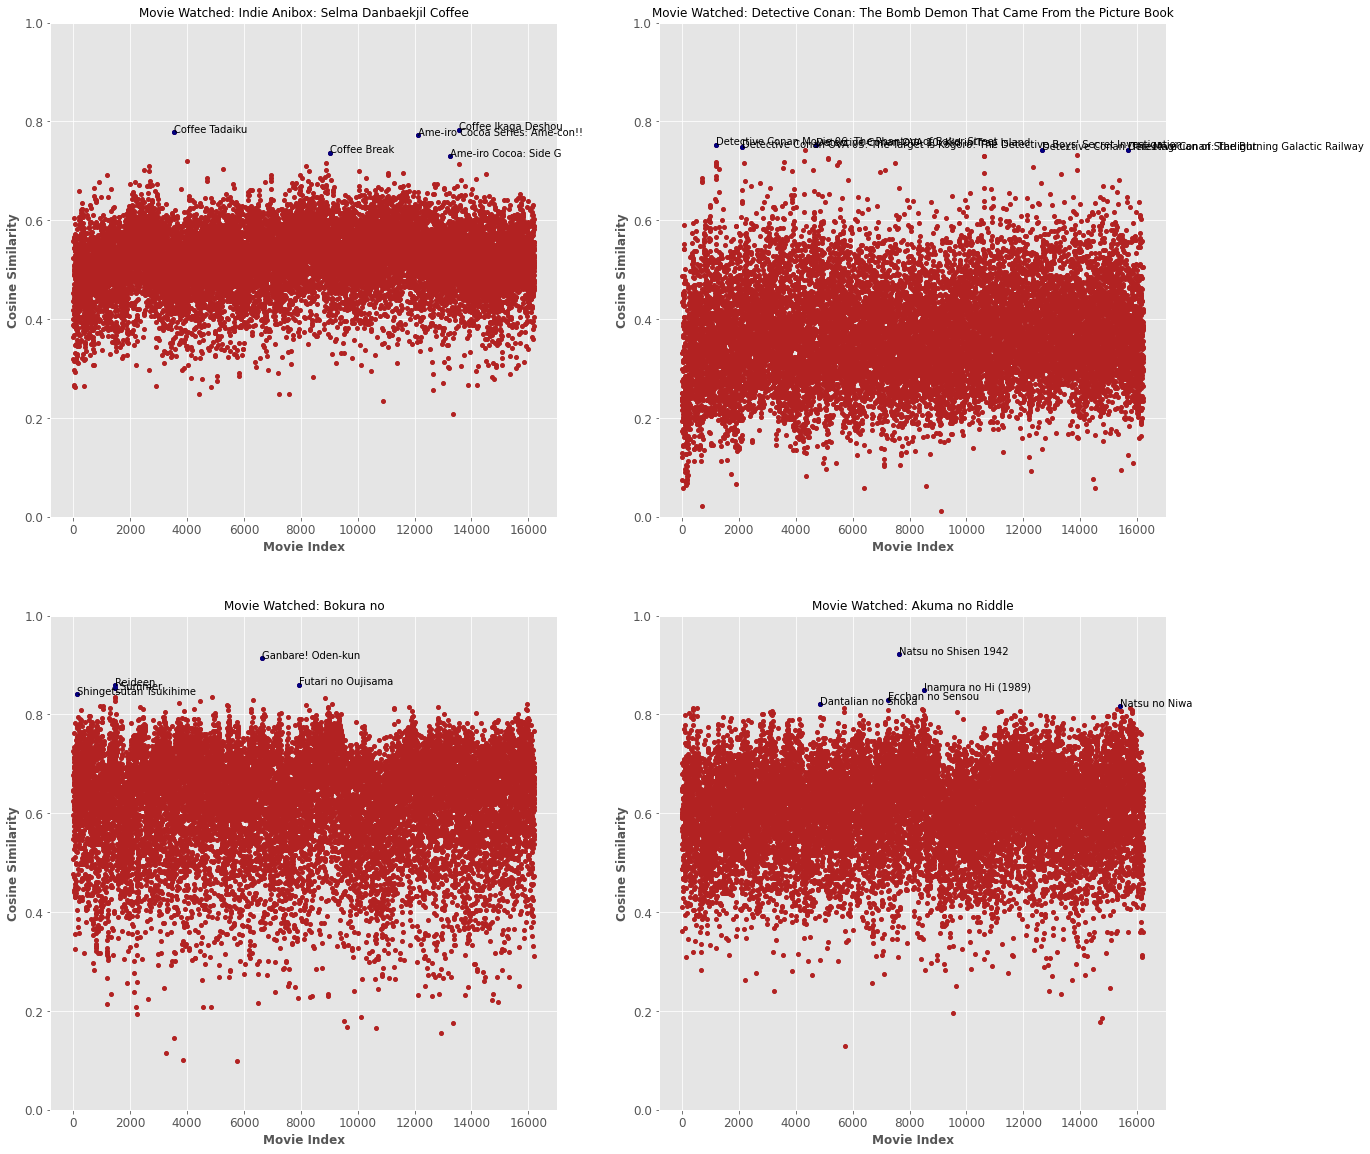

In [30]:
plt.figure(figsize=(20,20))
for q in range(1,5):
  plt.subplot(2,2,q)
  index = np.random.choice(np.arange(0,len(X)))
  to_plot_data = cos_sim_data.drop(index,axis=1)
  plt.plot(to_plot_data.loc[index],'.',color='firebrick')
  recomm_index = give_recommendations(index)
  x = recomm_index['Index']
  y = cos_sim_data.loc[index][x].tolist()
 
  m = recomm_index['Movies']
  plt.plot(x,y,'.',color='navy',label='Recommended Movies')
  plt.title('Movie Watched: '+data['Name'].loc[index])
  plt.xlabel('Movie Index')
  k=0
  for x_i in x:
    plt.annotate('%s'%(m[k]),(x_i,y[k]),fontsize=10)
    k=k+1

  plt.ylabel('Cosine Similarity')
  plt.ylim(0,1)

In [31]:
give_recommendations(2,True)

The watched movie is this one: Trigun 

The number 1 recommended movie is this one: Fumoon 

The number 1 recommended movie is this one: Chobits: Chibits 

The number 1 recommended movie is this one: Magikano 

The number 1 recommended movie is this one: Chobits 

The number 1 recommended movie is this one: Moeru! Oniisan 



{'Movies': array(['Fumoon', 'Chobits: Chibits', 'Magikano', 'Chobits',
        'Moeru! Oniisan'], dtype=object),
 'Index': [3704, 548, 529, 40, 3799]}

In [32]:
give_recommendations(2,False,True)

The plot of the watched movie is this one:
 Vash the Stampede is the man with a $$60,000,000,000 bounty on his head. The reason: he's a merciless villain who lays waste to all those that oppose him and flattens entire cities for fun, garnering him the title "The Humanoid Typhoon." He leaves a trail of death and destruction wherever he goes, and anyone can count themselves dead if they so much as make eye contact—or so the rumors say. In actuality, Vash is a huge softie who claims to have never taken a life and avoids violence at all costs. With his crazy doughnut obsession and buffoonish attitude in tow, Vash traverses the wasteland of the planet Gunsmoke, all the while followed by two insurance agents, Meryl Stryfe and Milly Thompson, who attempt to minimize his impact on the public. But soon, their misadventures evolve into life-or-death situations as a group of legendary assassins are summoned to bring about suffering to the trio. Vash's agonizing past will be unraveled and his mora

{'Movies': array(['Fumoon', 'Chobits: Chibits', 'Magikano', 'Chobits',
        'Moeru! Oniisan'], dtype=object),
 'Index': [3704, 548, 529, 40, 3799]}

In [33]:
give_recommendations(65,True,True,True)

The watched movie is this one: Mobile Suit Gundam ZZ 

The number 1 recommended movie is this one: Mobile Suit Zeta Gundam 

The number 1 recommended movie is this one: Mobile Suit Gundam F91 

The number 1 recommended movie is this one: Mobile Suit Gundam SEED MSV Astray 

The number 1 recommended movie is this one: Mobile Suit Gundam I 

The number 1 recommended movie is this one: Mobile Suit Victory Gundam 

The plot of the watched movie is this one:
 In Universal Century 0088, the Anti-Earth Union Group (AEUG) has emerged victorious in its war with the Earth Federation's Titans at the cost of devastating losses. Neo-Zeon, the third faction in the war formerly known as Axis Zeon, remains as powerful as ever. Led by Newtype Haman Karn, Neo-Zeon has been implementing plans to take over both Earth and the space colonies. The AEUG flagship Argama heads to the Side 1 colony Shangri-La for repairs. Living in the colony is Judau Ashta, a 14-year-old junk dealer who is struggling to make en

{'Movies': array(['Mobile Suit Zeta Gundam', 'Mobile Suit Gundam F91',
        'Mobile Suit Gundam SEED MSV Astray', 'Mobile Suit Gundam I',
        'Mobile Suit Victory Gundam'], dtype=object),
 'Index': [64, 67, 758, 965, 68]}